In [39]:
%load_ext autoreload
%autoreload 2
from yabf import Param, Parameter, Likelihood, Component, LikelihoodContainer, load_likelihood_from_yaml

%matplotlib inline
import matplotlib.pyplot as plt
from copy import copy
import numpy as np

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
lk = load_likelihood_from_yaml("two-bands.yml")

/home/steven/Documents/Projects/misc/yabf/yabf/likelihood.py:189: UserWarning: You have passed a parameter alias [p1] which matchesmore than one parameter [['low_band.LinPoly.p1', 'high_band.LinPoly.p1']]. Only information from the firstmatched parameter will be used to define the active parameter
  "parameter".format(al, full_aliases[-matched:])
/home/steven/Documents/Projects/misc/yabf/yabf/likelihood.py:189: UserWarning: You have passed a parameter alias [p2] which matchesmore than one parameter [['low_band.LinPoly.p2', 'high_band.LinPoly.p2']]. Only information from the firstmatched parameter will be used to define the active parameter
  "parameter".format(al, full_aliases[-matched:])
/home/steven/Documents/Projects/misc/yabf/yabf/likelihood.py:189: UserWarning: You have passed a parameter alias [p3] which matchesmore than one parameter [['low_band.LinPoly.p3', 'high_band.LinPoly.p3']]. Only information from the firstmatched parameter will be used to define the active parameter
  "

In [3]:
lk.fiducial_params

{'low_band': {'sigma': 0.013,
  'AbsorptionProfile': {'A': 0.5, 'tau': 7, 'w': 17.0, 'nu0': 75},
  'LinPoly': {'p0': 1750, 'p1': 0, 'p2': 0, 'p3': 0, 'p4': 0}},
 'high_band': {'sigma': 0.005,
  'AbsorptionProfile': {'A': 0.5, 'tau': 7, 'w': 17.0, 'nu0': 75},
  'LinPoly': {'p0': 1760, 'p1': 0, 'p2': 0, 'p3': 0, 'p4': 0}}}

In [6]:
lk.likelihoods[1].data

array([434.96526991, 431.75979335, 428.56786163, 425.40199354,
       422.28736099, 419.19760776, 416.1295035 , 413.11109926,
       410.1170726 , 407.14354392, 404.20774113, 401.30095964,
       398.42918037, 395.56865682, 392.74860951, 389.96403112,
       387.19375325, 384.4618688 , 381.75769837, 379.05972514,
       376.40747656, 373.7840946 , 371.16064451, 368.59009875,
       366.03709469, 363.49721268, 360.98847888, 358.50790922,
       356.04654567, 353.62344563, 351.21046941, 348.80996732,
       346.45721243, 344.10306323, 341.78510859, 339.48048376,
       337.21348205, 334.95326866, 332.7247585 , 330.49691749,
       328.30720204, 326.14299544, 323.97690878, 321.84405655,
       319.73354204, 317.63287136, 315.56353376, 313.51827036,
       311.46665995, 309.45887038, 307.44903438, 305.45522622,
       303.50322675, 301.55134001, 299.62178169, 297.7113639 ,
       295.81605646, 293.93152533, 292.06673276, 290.22704756,
       288.39154733, 286.58416142, 284.78177476, 283.01

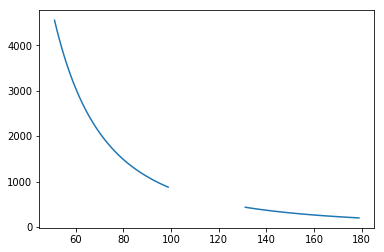

In [9]:
plt.plot(lk.likelihoods[0].freqs, lk.likelihoods[0].data, color="C0")
plt.plot(lk.likelihoods[1].freqs, lk.likelihoods[1].data, color="C0")

In [10]:
fid_models = lk._reduce_all()

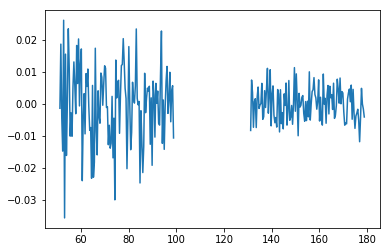

In [13]:
plt.plot(lk.likelihoods[0].freqs, lk.likelihoods[0].data - fid_models['low_band'], color="C0")
plt.plot(lk.likelihoods[1].freqs, lk.likelihoods[1].data - fid_models['high_band'], color="C0")

In [14]:
lk()

(843.7317043378983, [])

In [17]:
[(a.name, a.fiducial) for a in lk.child_active_params]

[('p1', 0),
 ('p2', 0),
 ('p3', 0),
 ('p4', 0),
 ('A', 0.5),
 ('tau', 7),
 ('nu0', 75),
 ('w', 17.0),
 ('sigma_low', 0.013),
 ('p0_low', 1750),
 ('sigma_hi', 0.005),
 ('p0_hi', 1760)]

In [18]:
[a.fiducial for a in lk.child_active_params]

[0, 0, 0, 0, 0.5, 7, 75, 17.0, 0.013, 1750, 0.005, 1760]

In [32]:
fid = [a.fiducial for a in lk.child_active_params]
for i in range(lk.total_active_params):
    fidd = copy(fid)
    fidd[i] += 0.001
    
    print(lk(fid)[0] - lk(fidd)[0]," ", end="")

    fidd[i] -= 0.002
    print(lk(fid)[0] - lk(fidd)[0])
    

0.9147126785144337  0.5735220563411758
2.069223060125296  1.0847929277384765
6.561200457833934  4.335529430728229
25.15373618801698  20.131280785302238
0.027651022366512734  0.19552346955720168
0.004963312331483394  -0.00495538965662945
0.017741622519793054  -0.016766916463097914
-0.020729526395030007  0.020979438866220335
1.926756938661697  -0.785642494049057
0.4929100745555388  0.7431476547675402
2.9053718814041076  8.488219277998155
0.14621023823258383  0.0010137788081010513


In [33]:
from scipy.optimize import minimize

In [34]:
minimize?

In [61]:
def objfunc(x):
    fidd =copy(fid)
    fidd[5:9] = x[:]
    return -lk(fidd)[0]

In [46]:
fnc = lambda x: -lk(x)[0]

In [62]:
minimize(objfunc, fid[5:9], bounds = [(None,None), (None,None), (None,None), (0,None)])

      fun: -844.486704242192
 hess_inv: <4x4 LbfgsInvHessProduct with dtype=float64>
      jac: array([   4.72547299,  -14.75850695,  -10.94094841, 1516.33258838])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 25
      nit: 2
   status: 0
  success: True
        x: array([6.99058486e+00, 7.49671982e+01, 1.70397032e+01, 1.29752631e-02])

In [64]:
fid

[0, 0, 0, 0, 0.5, 7, 75, 17.0, 0.013, 1750, 0.005, 1760]

In [63]:
lk.generate_refs()

[[array([-731.96688074])],
 [array([987.73560607])],
 [array([-696.17418828])],
 [array([138.94895355])],
 [array([0.51552481])],
 [array([7.40437365])],
 [array([79.47541705])],
 [array([21.16196411])],
 [array([0.01430443])],
 [array([2008.67962949])],
 [array([0.0129633])],
 [array([2029.72682691])]]